 All code concerning Gaussian Process computations that I have used is either derived by me from the class code or written by myself from scratch and therefore I have not used Gaussian Process code from others or shared my code with them.


Gausian Processes

In [6]:
import scipy
from scipy.spatial import distance
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm # colormap

#-------------------------------------------------------------
# def exponentiated_quadratic(xa, xb):
#     """Exponentiated quadratic  with σ=1"""
#     # L2 distance (Squared Euclidian)
#     sq_norm = -0.5 * distance.cdist(xa, xb, 'sqeuclidean')
#     return np.exp(sq_norm)

def kernel_function(x1, x2): #squared_exponential_kernel
    """
    Computes the squared exponential (RBF) kernel between two sets of points.

    Args:
    x1: A numpy array of shape (n1, d) representing the first set of points.
    x2: A numpy array of shape (n2, d) representing the second set of points.
    lengthscale: The lengthscale parameter controlling the kernel's smoothness.

    Returns:
    K: The kernel matrix of shape (n1, n2).
    
    """
    lengthscale=45 #.1 I increased this so that the funciton wouldnt just die and drop to 0 right after a sample
    
    n1, d = x1.shape
    n2, _ = x2.shape

    # Initialize the kernel matrix
    K = np.zeros((n1, n2))

    # Compute the kernel matrix element-wise
    for i in range(n1):
        for j in range(n2):
            diff = x1[i] - x2[j]
            K[i, j] = np.exp(-0.5 * np.dot(diff, diff) / (lengthscale ** 2))

    return K

#-------------------------------------------------------------
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1),
    and the prior kernel function.
    """
    # Kernel of the observations
    S11 = kernel_func(X1, X1) # in our case the Kernel will be the exponential quadratic Kernel
    # Kernel of observations vs to-predict
    S12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(S11, S12, assume_a='pos').T # this solves for {\Sigma_11)^{-1} \Sigma_12 which appers both in the posterior's mean and covariance
    # Compute posterior mean
    mu2 = solved @ y1
    # Compute the posterior covariance
    S22 = kernel_func(X2, X2)
    S2 = S22 - (solved @ S12)
    return mu2, S2  # mean, covariance

# Continuous-time Version of the Logistic Growth Model

Understanding the model, and playing with different growth rates of different animals

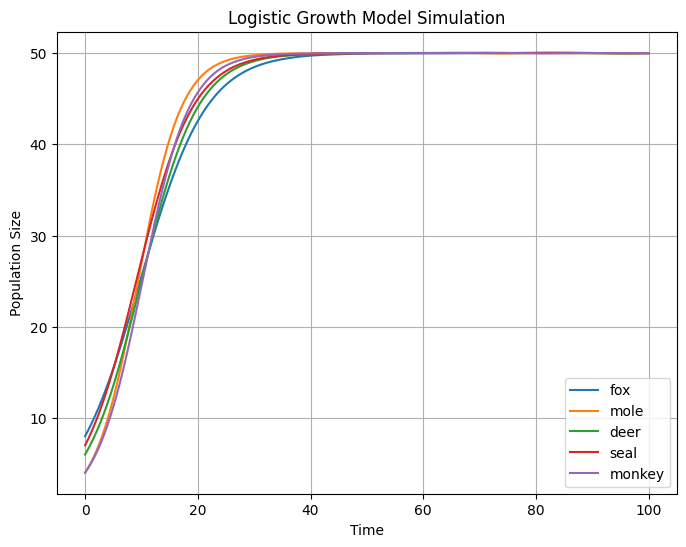

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the logistic growth ODE
def logistic_growth(t, x, r, K):
    dxdt = r * x * (1 - x / K)
    return dxdt

# Parameters
animal=['fox','mole','deer','seal','monkey']
r = [.17,.26,.2,.2,.24]  # Intrinsic growth rate
K = [50,50,50,50,50,50]  # Carrying capacity
initial_population = [8,4,6,7,4]  # Initial population size
simulation_duration = 100  # Duration of the simulation

    
# Time span for simulation
t_span = (0, simulation_duration)
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Logistic Growth Model Simulation')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.grid(True)

for case in range(len(r)):
    # Solve the ODE using SciPy's solve_ivp
    sol = solve_ivp(logistic_growth, t_span, [initial_population[case]], args=(r[case], K[case]), t_eval=np.linspace(0, simulation_duration, 1000))

    # Extract the results
    t = sol.t
    population = sol.y[0]

    # Plot the population over time
    # plt.figure(figsize=(8, 6))
    ax.plot(t, population, label=animal[case])
    # plt.title('Logistic Growth Model Simulation')
    # plt.xlabel('Time')
    # plt.ylabel('Population Size')
    # plt.grid(True)
    ax.legend()
plt.show()
# plt.legend

using only human and only changing initial condition (initial populaiton) between sample groups 

Population at time 100: 19.57230774882414


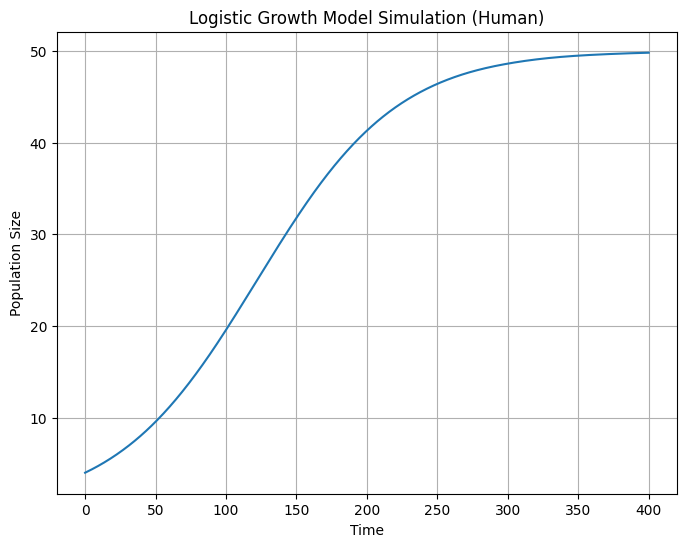

In [8]:
# Define the logistic growth ODE
def logistic_growth(t, x, r, K):
    dxdt = r * x * (1 - x / K)
    return dxdt

# def interpolate(t,population,desired_time):
#     # Interpolate the population values
#     interp_func = interp1d(t, population, kind='linear')
#     # Time at which you want to find the population
#     # Find the population at the desired time using interpolation
#     population_at_desired_time = interp_func(desired_time)
#     # Print the population at the desired time
#     # print(f"Population at time {desired_time}: {population_at_desired_time}")
#     return population_at_desired_time.flatten()
    
# def population(initial_population,simulation_duration, input):
#     r = .02 # Intrinsic growth rate
#     K = 50 # Carrying capacity
#     # Time span for simulation
#     t_span = (0, simulation_duration)
#     # Solve the ODE using SciPy's solve_ivp
#     sol = solve_ivp(logistic_growth, t_span, [initial_population], args=(r, K), t_eval=np.linspace(0, simulation_duration, 1000))
#     # Extract the results
#     t = sol.t
#     population = sol.y[0]
#     if input == "time":
#         output=t
#     else:
#         output=population
#     return output


initial_population = 4  # Initial population size
simulation_duration = 400  # Duration of the simulation
#-------------------------------------------------------------------------------

r = .02 # Intrinsic growth rate
K = 50 # Carrying capacity
# Time span for simulation
t_span = (0, simulation_duration)
# Solve the ODE using SciPy's solve_ivp
sol = solve_ivp(logistic_growth, t_span, [initial_population], args=(r, K), t_eval=np.linspace(0, simulation_duration, 1000))
# Extract the results
t = sol.t
population = sol.y[0]

desired_time=100
# Interpolate the population values
interp_func = interp1d(t, population, kind='linear')
# Time at which you want to find the population
# Find the population at the desired time using interpolation
population_at_desired_time = interp_func(desired_time)
# Print the population at the desired time
print(f"Population at time {desired_time}: {population_at_desired_time}")

#-------------------------------------------------------------------------------

# Plot the population over time
plt.figure(figsize=(8, 6))
# time=population(initial_population,simulation_duration, "time")
# print(len(time))
# pop=population(initial_population,simulation_duration,"pop")
# print(len(pop))
plt.plot(t,population)
plt.title('Logistic Growth Model Simulation (Human)')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.grid(True)
plt.show()

# print(interpolate(t,population,100))


## Applying gaussian processes to logistic growth of humans with different initial populations (initial conditions)

100
[3.42566136e+00 3.96631169e+00 4.53430816e+00 5.12353360e+00
 5.72873929e+00 6.34635909e+00 6.97523723e+00 7.61715997e+00
 8.27708910e+00 8.96301728e+00 9.68540314e+00 1.04561930e+01
 1.12874923e+01 1.21900037e+01 1.31713979e+01 1.42348102e+01
 1.53776674e+01 1.65910304e+01 1.78595937e+01 1.91624171e+01
 2.04743803e+01 2.17682625e+01 2.30172618e+01 2.41976988e+01
 2.52916049e+01 2.62888836e+01 2.71887586e+01 2.80002857e+01
 2.87417997e+01 2.94392823e+01 3.01237695e+01 3.08280334e+01
 3.15828839e+01 3.24134994e+01 3.33362268e+01 3.43562587e+01
 3.54665189e+01 3.66479570e+01 3.78712903e+01 3.91000457e+01
 4.02945803e+01 4.14166091e+01 4.24336696e+01 4.33229299e+01
 4.40737979e+01 4.46889209e+01 4.51833638e+01 4.55819948e+01
 4.59153540e+01 4.62145090e+01 4.65055611e+01 4.68045424e+01
 4.71134187e+01 4.74177822e+01 4.76866065e+01 4.78741646e+01
 4.79239248e+01 4.77739800e+01 4.73633660e+01 4.66385160e+01
 4.55590968e+01 4.41025659e+01 4.22669680e+01 4.00717228e+01
 3.75564029e+01 3.47

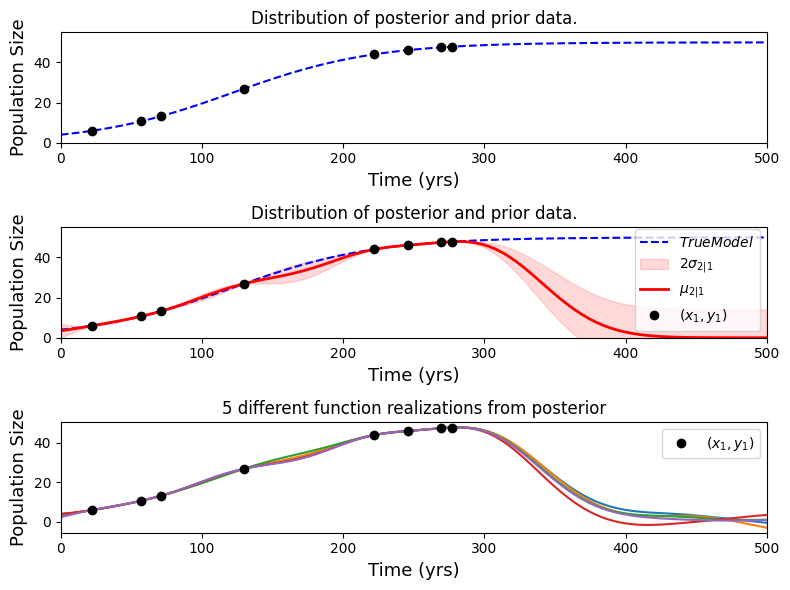

In [12]:
# smoothness=35

def interpolate(X):
    r = .02 # Intrinsic growth rate
    K = 50 # Carrying capacity
    # Time span for simulation
    t_span = (0, simulation_duration)
    # Solve the ODE using SciPy's solve_ivp
    sol = solve_ivp(logistic_growth, t_span, [initial_population], args=(r, K), t_eval=np.linspace(0, simulation_duration, 1000))
    # Extract the results
    t = sol.t
    population = sol.y[0]

    desired_time=X
    interp_func = interp1d(t, population, kind='linear')
    # Time at which you want to find the population
    # Find the population at the desired time using interpolation
    population_at_desired_time = interp_func(desired_time)
    return population_at_desired_time.flatten()

initial_population = 4  # Initial population size
simulation_duration = 500  # Duration of the simulation

n1 = 8  # Number of points to condition on (training points). These are the points where we have measurements y = f(x)
n2 = 100  # Number of points in posterior (test points). These are the points where we want to predict without having measurements
ny = 5  # Number of functions that will be sampled from the posterior. These are the various realizations of the GP posterior.
domain = (0, 500) # This is the input process

# Sample observations (X1, y1) on the function
X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1)) # we sample randomly 8 samples between X = (2,498)
y1 = interpolate(X1)
# print('X1',X1)
# print('y1',y1)

# Predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1) # here we use 75 points in the domain X = (0,500) to predict process
# print('x2',X2)
# Compute posterior mean and covariance
mu2, S2 = GP(X1, y1, X2, kernel_function)#(lengthscale=smoothness)
print(len(mu2))
print(mu2)
print(type(mu2))

# Compute the standard deviation at the test points to be plotted
ss2 = np.sqrt(np.diag(S2))
# ss2=ss2*10
scale_func=7
# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mu2, cov=S2*scale_func, size=ny) # we draw ny realizations of the posterior Gaussian Process
# plot posterior distribution
fig, (ax1, ax3,ax2) = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

# ys = np.random.multivariate_normal(
#     mean=np.zeros(nb_of_samples), cov=S,
#     size=number_of_functions)

# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, interpolate(X2), 'b--', label='$True Model$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('Time (yrs)', fontsize=13)
ax1.set_ylabel('Population Size', fontsize=13)
ax1.set_title('Distribution of posterior and prior data.')
ax1.axis([domain[0], domain[1], 0, 55])

#scale standard deviation for visability
scale_red=7 #1
# Plot the distribution of the function (mean, covariance)
ax3.plot(X2, interpolate(X2), 'b--', label='$True Model$')
ax3.fill_between(X2.flat, mu2-2*ss2*scale_red, mu2+2*ss2*scale_red, color='red',
alpha=0.15, label='$2 \sigma_{2|1}$') # here we are filling the subplot 1 (referenced with ax1 axes pointer) with color between mu2±sigma2
ax3.plot(X2, mu2, 'r-', lw=2, label='$\mu_{2|1}$')
ax3.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax3.set_xlabel('Time (yrs)', fontsize=13)
ax3.set_ylabel('Population Size', fontsize=13)
ax3.set_title('Distribution of posterior and prior data.')
ax3.axis([domain[0], domain[1], 0, 55])
ax3.legend()

# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax2.set_xlabel('Time (yrs)', fontsize=13)
ax2.set_ylabel('Population Size', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax2.set_xlim(domain[0], domain[1])
ax2.legend() #(loc='lower right')

plt.tight_layout()
plt.show()

3-d plot of logistic groth model for humans with different initial populations

[[  1.           2.           3.         ...  98.          99.
  100.        ]
 [  1.01999115   2.03915037   3.05747866 ...  96.15390714  97.09696359
   98.03928041]
 [  1.04037347   2.07903392   3.11598558 ...  94.41099137  95.30165658
   96.19096475]
 ...
 [  6.32522919  11.41039753  15.58762022 ...  53.70683275  53.74875987
   53.789912  ]
 [  6.43769128  11.58928181  15.8051703  ...  53.62732042  53.66828677
   53.70849456]
 [  6.55185297  11.77011516  16.02434279 ...  53.54962638  53.58965652
   53.62894417]]
100


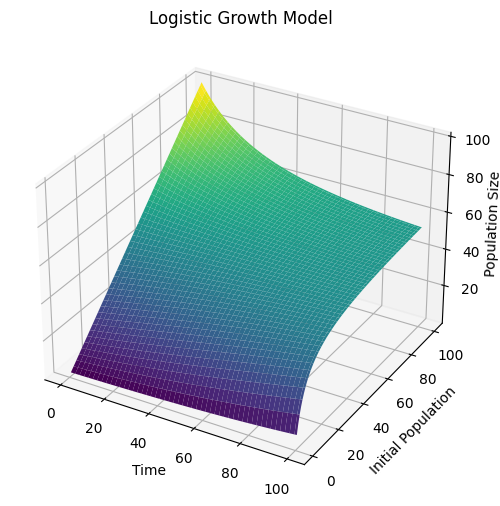

In [10]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a grid of initial population sizes and time values
initial_population_range = np.linspace(1, 100, 100)  # Adjust the range as needed
time_range = np.linspace(0, 100, 100)  # Adjust the range as needed
initial_population, time = np.meshgrid(initial_population_range, time_range)

# Calculate the population size at each (initial_population, time) pair using the logistic growth model
population = K * initial_population / (initial_population + (K - initial_population) * np.exp(-r * time))
print(population)
print(len(population))
# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(time, initial_population, population, cmap='viridis')  # Adjust the colormap as desired

ax.zaxis.labelpad = 0  # dencrease padding for the y-label

ax.set_xlabel('Time')
ax.set_ylabel('Initial Population')
ax.set_zlabel('Population Size')
ax.set_title('Logistic Growth Model')
plt.show()

# X, Y = np.meshgrid(x, y)

# Z = interpolate(t, population(t,initial_population,simulation_duration))


[]
predicted pop [[[ 0.87472213  1.03463955  1.19325471 ... 49.71793195 48.92023233
   47.60597052]]

 [[ 2.54241348  2.65771699  2.74879543 ... 48.38402591 46.66523223
   44.57788702]]

 [[ 0.29102977  0.45956711  0.68520705 ... 44.74984759 42.45131818
   39.8289876 ]]

 ...

 [[ 5.29403807  6.67485692  8.31073374 ... 44.82433914 42.552898
   39.95444061]]

 [[20.61269785 23.95383399 27.49920662 ... 21.59269705 18.59190958
   15.79140957]]

 [[60.13747356 62.7568764  64.68397549 ...  3.60470105  2.78959729
    2.1319954 ]]]
100


ValueError: Argument Z must be 2-dimensional.

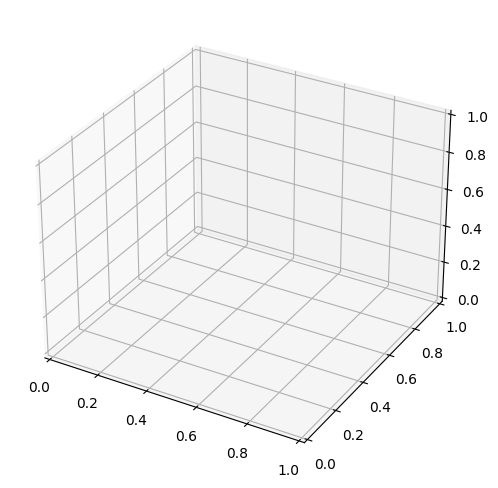

In [11]:
def interpolate(X, initial_population_i):
    r = .02 # Intrinsic growth rate
    K = 50 # Carrying capacity
    # Time span for simulation
    t_span = (0, simulation_duration)
    # Solve the ODE using SciPy's solve_ivp
    sol = solve_ivp(logistic_growth, t_span, [initial_population_i], args=(r, K), t_eval=np.linspace(0, simulation_duration, 1000))
    # Extract the results
    t = sol.t
    population = sol.y[0]

    desired_time=X
    interp_func = interp1d(t, population, kind='linear')
    # Time at which you want to find the population
    # Find the population at the desired time using interpolation
    population_at_desired_time = interp_func(desired_time)
    return population_at_desired_time.flatten()

# Create a grid of initial population sizes and time values
initial_population_range = np.linspace(1, 100, 100)  # Adjust the range as needed
time_range = np.linspace(0, 100, 100)  # Adjust the range as needed
initial_population, time = np.meshgrid(initial_population_range, time_range)

predicted_population= []#np.zeros(100)
print(predicted_population)
i=0

# Calculate the population size at each (initial_population, time) pair using the logistic growth model
for initial_pop in initial_population_range:
    X1 = np.random.uniform(domain[0]+2, domain[1]-2, size=(n1, 1)) # we sample randomly 8 samples between X = (2,498)
    y1 = interpolate(X1,initial_pop)
    X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1) # here we use 75 points in the domain X = (0,500) to predict process
    mu2, S2 = GP(X1, y1, X2, kernel_function)#(lengthscale=smoothness)
    population_sample=mu2 #np.array(
    #population= K * initial_population / (initial_population + (K - initial_population) * np.exp(-r * time))
    # print(len(population))
    # print(population_sample)
    # predicted_population[i]=population_sample
    predicted_population.append([population_sample])
    # predicted_population=np.append(predicted_population,[population_sample])
    # predicted_population=np.concatenate((predicted_population,population_sample), axis=0)
    # print(predicted_population)
    
    i+=1
    # print(i)
predicted_population=np.array(predicted_population)
print('predicted pop',predicted_population)
# print('initial pop',initial_population)
    
print(len(predicted_population))
# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(time, initial_population, predicted_population, cmap='viridis')  # Adjust the colormap as desired
# ax.plot_trisurf(time_range, initial_population_range, predicted_population, cmap='viridis')  # Adjust the colormap as desired


ax.zaxis.labelpad = 0  # dencrease padding for the y-label

ax.set_xlabel('Time')
ax.set_ylabel('Initial Population')
ax.set_zlabel('Population Size')
ax.set_title('Logistic Growth Model')
plt.show()